In [ ]:
#Jonathan Borowsky
#1/29/25
#found only in at least 3 dimensions: knotted energy wells (or interlocking ring-shaped ones)
    #can we find a system with such an energy well?
    # Consider two rotatable facing each other and seated in the sides of a groove. 
    # Only by popping out into the groove can they rotate. 
    # Thus either one can rotate while the other is retracted. 
    # This produces two interlocking ring wells in 3d space (angle1, angle2, relative_extension), joined by a doubly retracted configuration

#there are probably weird knotted sheets found only in 4d and above

In [ ]:
#for ultrafast propagation, generate a landscape, then generate a graph where 
#the nodes carry (energy, coordinates) labels, then turn the graph into an MSM.
#Trajectories can then be calculated using the TPM
#for a hybrid approach label each frame based on the coordinates of the node 
#for that state and add a little noise, but that might be slower than just running the dynamics


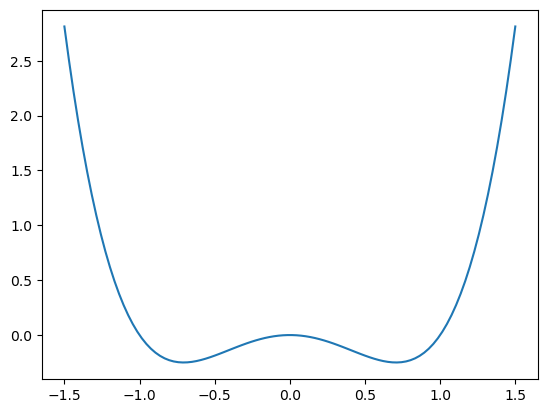

In [75]:
class unit_double_well():

    x = sp.symbols('x')
    u = x**4 - x**2
    f = -sp.diff(u, x)
    
    def potential(self, x):
        return x**4 - x**2
        
    def force(self, x):
        return -4*x**3 + 2*x

    def plot_quantity(self, quantity):
        x_extr = 1.5
        plt.plot(np.linspace(-x_extr, x_extr, 100), [quantity(i) for i in np.linspace(-x_extr, x_extr, 100)])

udw1 = unit_double_well()

udw1.plot_quantity(udw1.potential)

-4*x**3 + 2*x


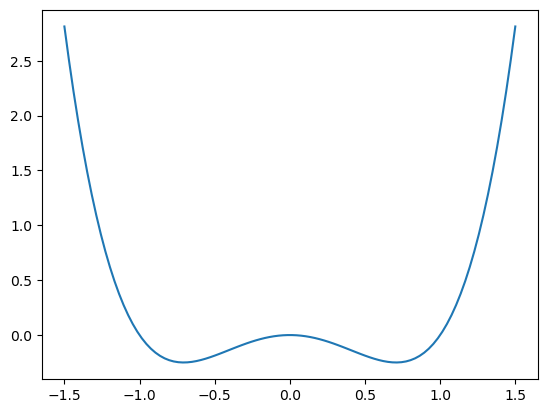

In [73]:
class unit_double_well_sympy():

    x = sp.symbols('x')
    u = x**4 - x**2
    f = -sp.diff(u, x)
    
    def potential(self, x1):
        return self.u.subs(x, x1)
        
    def force(self, x1):
        return self.f.subs(x, x1)

    def plot_quantity(self, quantity):
        x_extr = 1.5
        plt.plot(np.linspace(-x_extr, x_extr, 100), [quantity(i) for i in np.linspace(-x_extr, x_extr, 100)])

udw1 = unit_double_well_sympy()

udw1.plot_quantity(udw1.potential)
print(udw1.f)

In [51]:
import sympy as sp

# Define the variable and the function
x = sp.symbols('x')
f = x**3 - 6*x**2 + 9*x + 1

# Calculate the first derivative
df = sp.diff(f, x)

# Find critical points by solving the equation df = 0
critical_points = sp.solve(df, x)

# Calculate the second derivative
d2f = sp.diff(df, x)

# Check the sign of the second derivative at each critical point
for point in critical_points:
    if d2f.subs(x, point) < 0:
        print(f"Local maximum at x = {point}")

Local maximum at x = 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

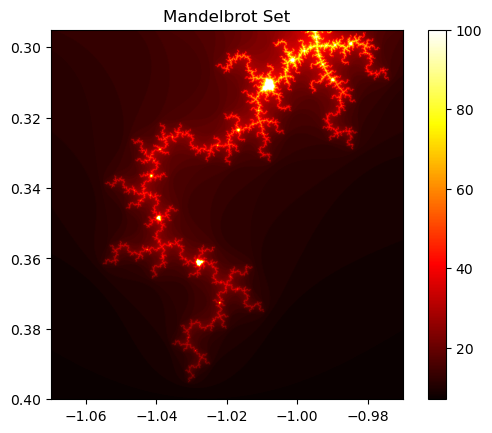

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    C = np.meshgrid(x, y)
    C = C[0] + 1j * C[1]
    mandelbrot_image = np.zeros((height, width))
    for i in range(width):
        for j in range(height):
            mandelbrot_image[i, j] = mandelbrot(C[i, j], max_iter)
    return mandelbrot_image

# Set parameters
xmin, xmax, ymin, ymax = -1.07, -.97, .295, .4
width, height = 2000, 2000
max_iter = 100

# Generate Mandelbrot set
mandelbrot_image = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

# Plot the Mandelbrot set
plt.imshow(mandelbrot_image, extent=(xmin, xmax, ymax, ymin), cmap='hot')
plt.colorbar()
plt.title("Mandelbrot Set")
plt.show()

In [ ]:
# Define the parameters of the Gaussians
means = [(0, 0), (2, 2), (-2, -2)]
covs = [[[1, 0], [0, 1]], [[2, 0], [0, 2]], [[0.5, 0], [0, 0.5]]]

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the Gaussians at each point
Z = np.zeros((len(x), len(y)))
for mean, cov in zip(means, covs):
    Z += np.exp(-0.5 * ((X - mean[0])**2 / cov[0][0] + (Y - mean[1])**2 / cov[1][1]))

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Z, cmap="viridis")
plt.title("Heatmap of Multiple Gaussians")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

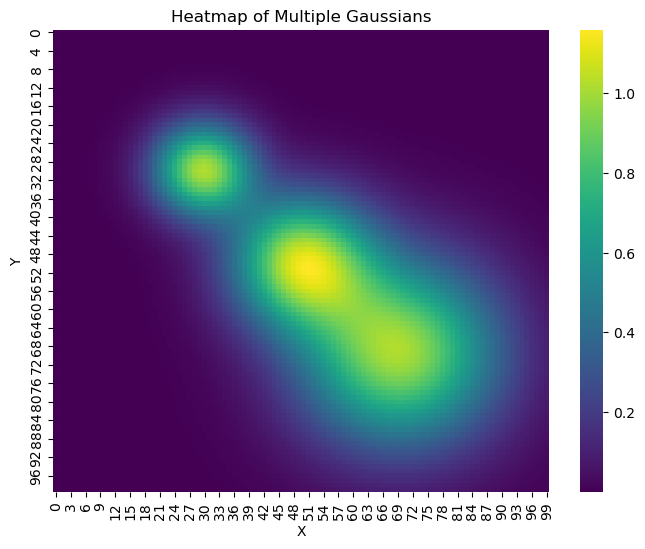

In [2]:
# Define the parameters of the Gaussians
means = [(0, 0), (2, 2), (-2, -2)]
covs = [[[1, 0], [0, 1]], [[2, 0], [0, 2]], [[0.5, 0], [0, 0.5]]]

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the Gaussians at each point
Z = np.zeros((len(x), len(y)))
for mean, cov in zip(means, covs):
    Z += np.exp(-0.5 * ((X - mean[0])**2 / cov[0][0] + (Y - mean[1])**2 / cov[1][1]))

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Z, cmap="viridis")
plt.title("Heatmap of Multiple Gaussians")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()